# Метод Ньютона

In [1]:
def calc_f(x):
    return -1.38*x**3 - 5.42*x**2 + 2.57*x + 10.95

def deriv_f(x):
    return -1.38*3*x**2 - 5.42*2*x + 2.57

def deriv2_f(x):
    return -1.38*3*2*x - 5.42*2

In [2]:
def newtonsMethod(x0, eps):
    global n
    x1 = x0 - (calc_f(x0) / deriv_f(x0))
    while (abs(calc_f(x0)) > eps):
        n = n + 1
        x1 = x0 - (calc_f(x0) / deriv_f(x0))
        x0 = x1
    return x1

In [30]:
def iter_f (a, b, step, eps):
    global n
    n = 0
    while (a <= b):
        if (calc_f(a)*calc_f(a + step) <= 0 and deriv_f(a)*deriv_f(a + step) > 0 and deriv2_f(a)*deriv2_f(a + step) > 0 and abs(deriv_f(a)) > eps):
            if (calc_f(a)*deriv2_f(a) > 0):
                ans = newtonsMethod(a, eps)
                print ("x =", ans)
                print ("f(", ans, ") = ", calc_f(ans), "\n")
            else:
                ans = newtonsMethod(a + step, eps)
                print ("x =", ans)
                print ("f(", ans, ") = ", calc_f(ans), "\n")
        a = a + step
    print("Количество итераций: ", n)

In [11]:
def answer (a, eps):
    global n
    print("Введите: 1 - для вывода ответа на экран; 2 - для сохранения ответа в файл.")
    
    err = True
    while (err == True):
        kuda_write = input()
        if (kuda_write == '1' or kuda_write == '2'):
            err = False
        else:
            print(":(")
    
    if (kuda_write == '1'):
        x = newtonsMethod(a, eps)
        print (f'Начальное приближение = {a}, погрешность = {eps}\n\nОтвет:\nx = {x}\nf(x) = {calc_f(x)}\nКоличество итераций = {n}')
    if (kuda_write == '2'):
        out_file = open("answer_newton.txt", "w")
        x = newtonsMethod(a, eps)
        str_ans = f'Начальное приближение = {a}, погрешность = {eps}\n\nОтвет:\nx = {x}\nf(x) = {calc_f(x)}\nКоличество итераций = {n}'
        out_file.write(str_ans)

# Ввод данных с файла

В файле data_newton.txt должны находиться 2 значения в разных строках:

1. Начальное приближение
2. Погрешность

In [10]:
with open('data_newton.txt', 'r') as myfile:
    content = myfile.readlines()
    
content = [x.strip() for x in content] 

try:
    a = float(content[0])
    eps = float(content[2])
except Exception:
    ("Проверьте правильность данные в файле")
n = 0
answer(a, eps)

Введите: 1 - для вывода ответа на экран; 2 - для сохранения ответа в файл.
1
Начальное приближение = 1.4, погрешность = 1e-11

Ответ:
x = 1.4066400781543442
f(x) = -3.552713678800501e-15
Количество итераций = 9


# Ввод данных с клавиатуры

In [14]:
err = True

while (err == True):
    try:
        print ("Введите начальное приближение:")
        a = float(input())
        print ("Введите погрешность:")
        eps = float(input())
        err = False
    except Exception:
        print("Ошибка. Проверьте правильность введенных данных\n")

n = 0
answer(a, eps)

Введите начальное приближение:
-3
Введите погрешность:
0.00001
Введите: 1 - для вывода ответа на экран; 2 - для сохранения ответа в файл.
2


# Поиск всех корней на промежутке [a, b]

In [34]:
err = True

while (err == True):
    try:
        print ("Введите координату начала:")
        a = float(input())
        print ("Введите координату конца:")
        b = float(input())
        if (a > b):
            print("Координата конца больше координаты начала? :С")
            raise Exception("")
        print ("Введите погрешность:")
        eps = float(input())
        err = False
    except Exception:
        print("Ошибка. Проверьте правильность введенных данных\n")

print ("\nОтвет:")
iter_f(a, b, 0.1, eps)

Введите координату начала:
-5
Введите координату конца:
5
Введите погрешность:
0.000000001

Ответ:
x = -3.8805179575137543
f( -3.8805179575137543 ) =  1.5987211554602254e-14 

x = -1.4536583525246491
f( -1.4536583525246491 ) =  0.0 

x = 1.4066400781543442
f( 1.4066400781543442 ) =  -3.552713678800501e-15 

Количество итераций:  10


# График функции

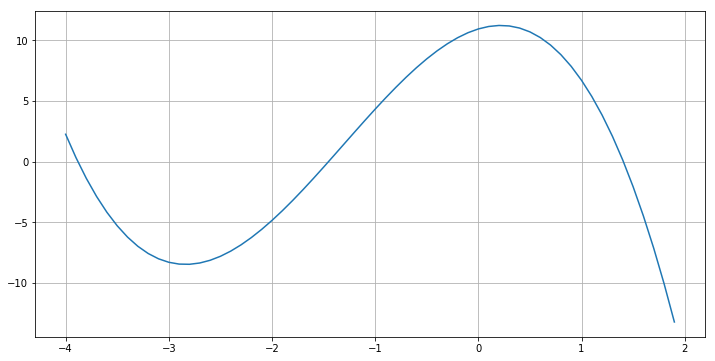

In [36]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

x = np.array(np.arange(-4, 2, step=0.1)) 
y = calc_f(x)
plt.figure(figsize=(12,6))
plt.plot(x, y) 
plt.grid()
plt.show()